In [232]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import json
from dateutil import parser
from datetime import datetime

In [233]:
map_json = json.load(open('all_tiers.json'))

In [235]:
def age_in_days(dt):
    return (datetime.today() - parser.parse(dt)).days

def difficulty(m):
    return age_in_days(m['info']['added']) / m['info']['completions']

def filter_tier(maps, tier):
    return [m for m in maps if m['info']['tier'] == tier]

def create_age_scatter(maps=[], tier=1):
    tier_maps = filter_tier(maps, tier)
    return go.Scatter(
            x           = [age_in_days(m['info']['added']) for m in tier_maps],
            y           = [difficulty(m) for m in tier_maps],
            fillcolor   = 'red',
            mode        = 'markers',
            marker_size = [m['info']['tier']*5 for m in tier_maps],
            name        = f'Tier {tier}',
        )

def create_tier_scatter(maps=[], tier=1, horizontal: bool = False):
    tier_maps = filter_tier(maps, tier)
    coords = {
        'x': [tier for _ in tier_maps],
        'y': [difficulty(m) for m in tier_maps],
    }
    if horizontal:
        coords = {'x': coords['y'], 'y': coords['x']}

    return go.Scatter(
            **coords,
            fillcolor   = 'red',
            mode        = 'markers',
            marker_size = [20 for m in tier_maps],
            name        = f'Tier {tier}',
        )

def create_map_scatter(m):
    return go.Scatter(
        y           = [m['info']['tier']],
        x           = [difficulty(m)],
        fillcolor   = 'red',
        mode        = 'markers',
        marker_size = [20],
        text        = f'{m["name"]} (Tier {m["info"]["tier"]})',
        # name        = m['name'],
    )

In [236]:
json.dumps(map_json[0])

'{"name": "kz_giantbean", "info": {"completions": 50, "times played": 526, "tier": 1, "stage_type": "Linear", "bonus": 2, "checkpoints": 0, "author": "Kreedz", "added": "2023-08-24"}}'

In [237]:
def frame_args(duration):
    return {
        'frame':       {'duration': duration},
        'mode':        'immediate',
        'fromcurrent': True,
        'transition':  {'duration': duration, 'easing': 'linear'},
    }

def animate_fig(fig):
    sliders = [
        {
            'pad': {'b': 10, 't': 60},
            'len': 0.9,
            'x':   0.1,
            'y':   0,
            'steps': [
                {
                    'args':   [[f.name], frame_args(0)],
                    'label':  str(k),
                    'method': 'animate',
                }
                for k, f in enumerate(fig.frames)
            ],
        }
    ]
    fig.update_layout(
        sliders     = sliders,
        updatemenus = [{
            'buttons': [{
                'args':   [None, frame_args(50)],
                'label':  '&#9654;', # play symbol
                'method': 'animate',
            },
            {
                'args':   [[None], frame_args(0)],
                'label':  '&#9724;', # pause symbol
                'method': 'animate',
            }],
            'direction': 'left',
            'pad':       {'r': 10, 't': 70},
            'type':      'buttons',
            'x':         0.1,
            'y':         0,
        }],
    )
    return fig

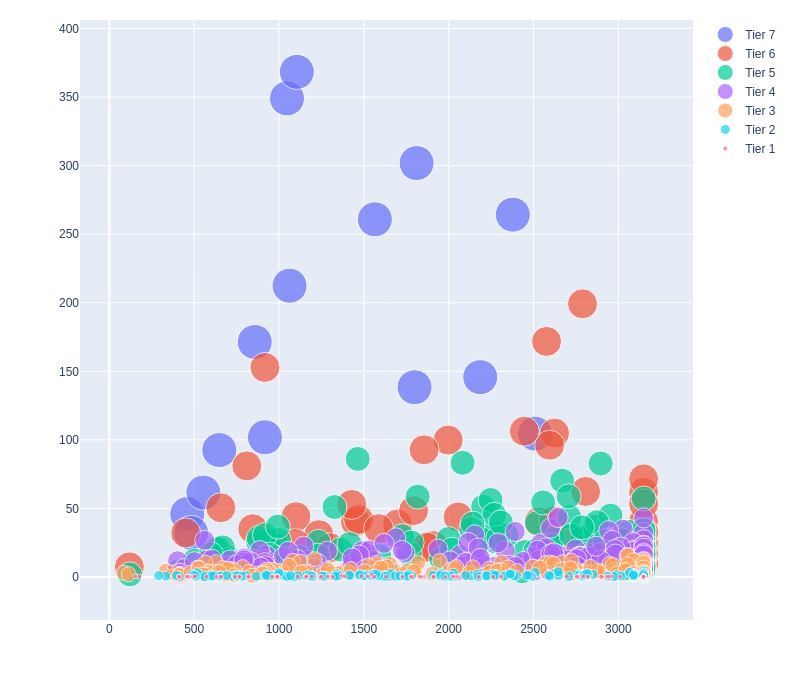

In [238]:
fig = go.Figure(
    data=[create_age_scatter(map_json, tier) for tier in reversed(range(1,8))],
    layout={'height': 700, 'margin': {'t': 20}}
)

fig.show()

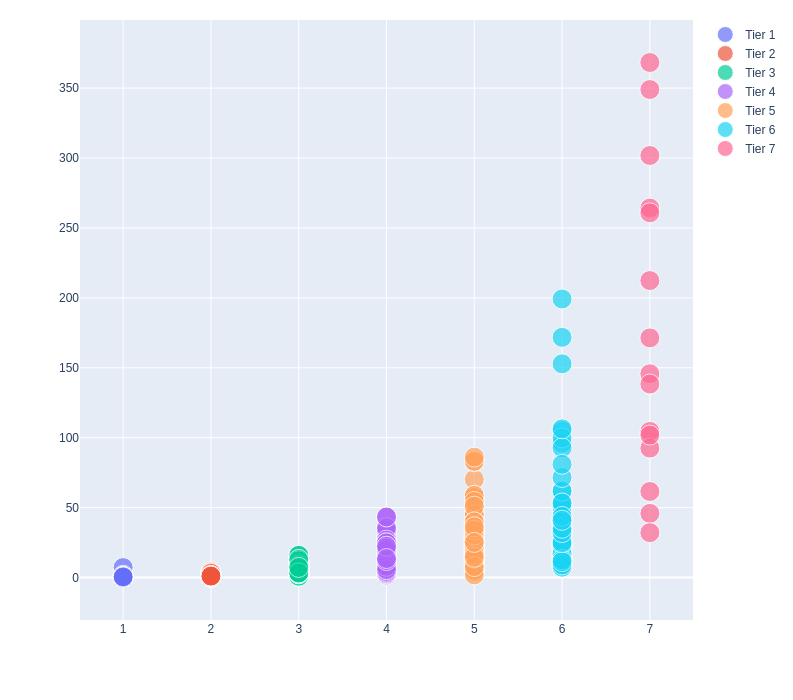

In [239]:
fig = go.Figure(
    data   = [create_tier_scatter(map_json, tier) for tier in range(1,8)],
    layout = {'height': 700, 'margin': {'t': 20}},
)

fig.show()

In [240]:
json.dumps(map_json[0])

'{"name": "kz_giantbean", "info": {"completions": 50, "times played": 526, "tier": 1, "stage_type": "Linear", "bonus": 2, "checkpoints": 0, "author": "Kreedz", "added": "2023-08-24"}}'

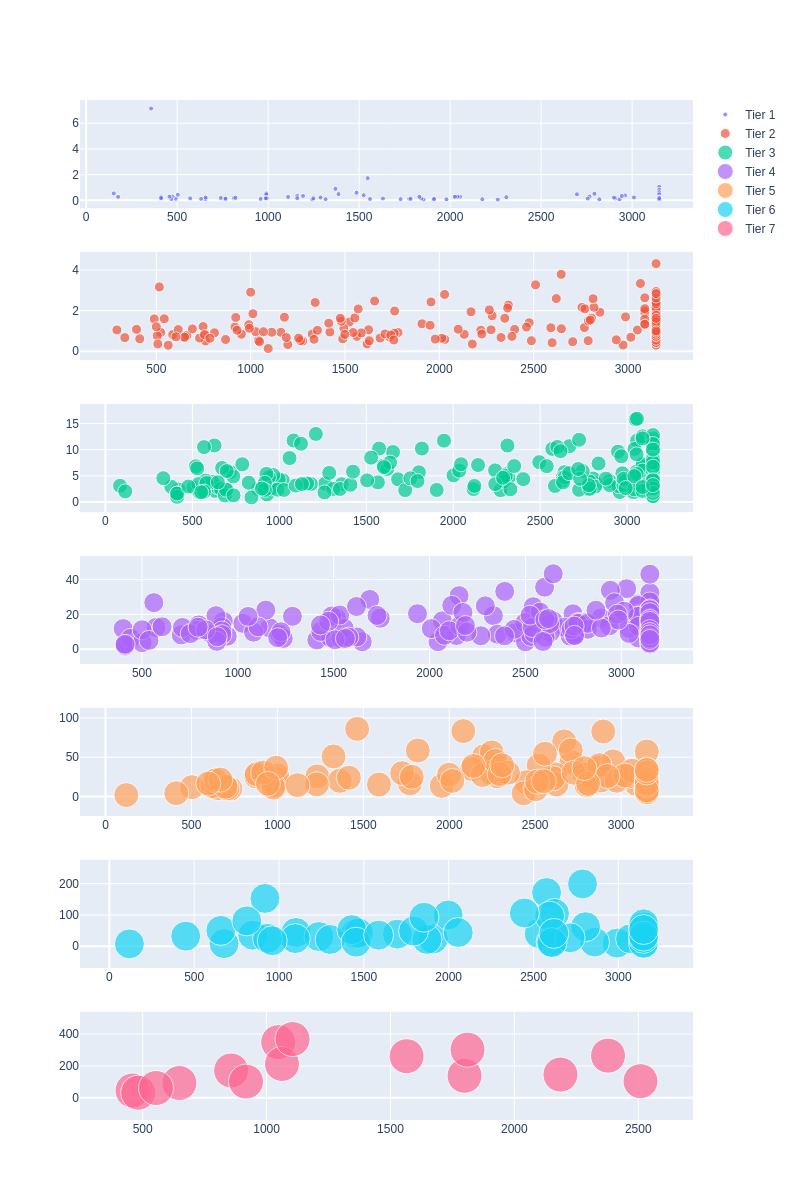

In [246]:
fig = make_subplots(rows=7, cols=1) #, layout={'height': 500})

for tier in range(1,8):
    fig.add_trace(
        create_age_scatter(map_json, tier),
        row = tier,
        col = 1,
    )
fig.update_layout({'height': 1200})
fig.show()

In [ ]:
def frame_args(duration):
    return {
        'frame':       {'duration': duration},
        'mode':        'immediate',
        'fromcurrent': True,
        'transition':  {'duration': duration, 'easing': 'linear'},
    }

def animate_fig(fig):
    sliders = [
        {
            'pad': {'b': 10, 't': 60},
            'len': 0.9,
            'x':   0.1,
            'y':   0,
            'steps': [
                {
                    'args':   [[f.name], frame_args(0)],
                    'label':  str(k),
                    'method': 'animate',
                }
                for k, f in enumerate(fig.frames)
            ],
        }
    ]
    fig.update_layout(
        sliders     = sliders,
        updatemenus = [{
            'buttons': [{
                'args':   [None, frame_args(50)],
                'label':  '&#9654;', # play symbol
                'method': 'animate',
            },
            {
                'args':   [[None], frame_args(0)],
                'label':  '&#9724;', # pause symbol
                'method': 'animate',
            }],
            'direction': 'left',
            'pad':       {'r': 10, 't': 70},
            'type':      'buttons',
            'x':         0.1,
            'y':         0,
        }],
    )
    return fig

In [ ]:
fig = go.Figure(
    frames=[
        go.Frame(
            data=create_tier_scatter(map_json, tier),
            layout={'height': 1000},
            name=tier,
        )
        for tier in range(1,8)
    ]
)
animate_fig(fig).show()

